In [1]:
import pydicom as dcm
import matplotlib.pyplot as plt

In [2]:
test = dcm.read_file("../sample_data/test.dcm")

In [3]:
test_ary = test.pixel_array

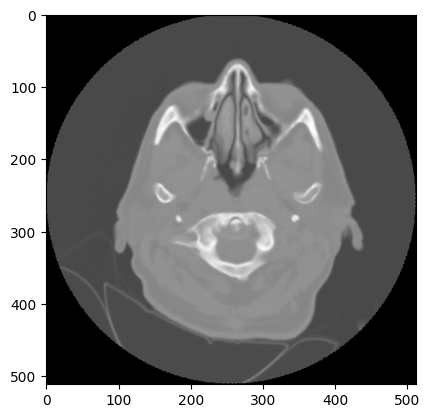

In [5]:
plt.imshow(test_ary, cmap=plt.cm.gray)

In [11]:
# Function to take care of teh translation and windowing.
def window_image(img, window_center, window_width, intercept, slope, rescale=True):
    img = (
        img * slope + intercept
    )  # for translation adjustments given in the dicom file.
    img_min = window_center - window_width // 2  # minimum HU level
    img_max = window_center + window_width // 2  # maximum HU level
    img[
        img < img_min
    ] = img_min  # set img_min for all HU levels less than minimum HU level
    img[
        img > img_max
    ] = img_max  # set img_max for all HU levels higher than maximum HU level
    if rescale:
        img = (img - img_min) / (img_max - img_min) * 255.0
    return img


def get_first_of_dicom_field_as_int(x):
    # get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dcm.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)


def get_windowing(data):
    dicom_fields = [
        data.WindowCenter,  # window center
        data.WindowWidth,  # window width
        data.RescaleIntercept,  # intercept
        data.RescaleSlope,  # slope] #slope
    ]
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [12]:
image = test_ary

In [13]:
window_center, window_width, intercept, slope = get_windowing(test)
window_center, window_width, intercept, slope

(40, 120, 0, 1)

In [14]:
image = window_image(image, window_center, window_width, intercept, slope, rescale=True)

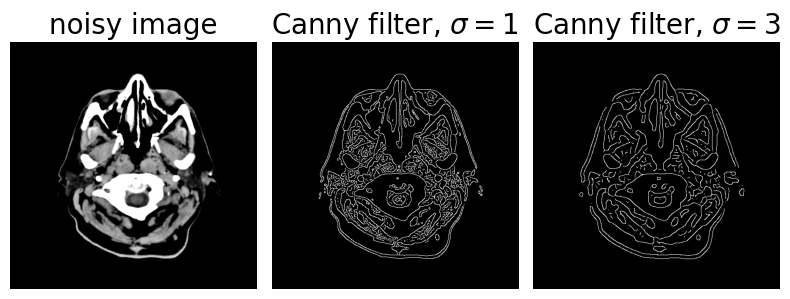

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("noisy image", fontsize=20)

ax[1].imshow(edges1, cmap="gray")
ax[1].set_title(r"Canny filter, $\sigma=1$", fontsize=20)

ax[2].imshow(edges2, cmap="gray")
ax[2].set_title(r"Canny filter, $\sigma=3$", fontsize=20)

for a in ax:
    a.axis("off")

fig.tight_layout()
plt.show()